In [1]:
#导入包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#二进制序列
Q =np.array([1,0,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1])


In [3]:
#getBVGPoint函数：输入序列Q，返回VG图中需要连接的两点坐标的集合
def getBVGPoint(Q):
    #坐标
    x=np.array(range(1,len(Q)+1))
    y=np.array(Q)

    #准备序列a,b，将相连的两点的x坐标分别记录在a,b序列中
    a=[]
    b=[]

    #遍历,获得连接两点的横坐标
    #控制ta移动
    for ta in range(0,len(x)-1):
        #控制tb移动
        for tb in range(ta+1,len(x)):
            ta=ta
            ya=y[ta]
            tb=tb
            yb=y[tb]
            #tc在ta,tb之间
            tc=np.array(range(ta+1,tb))
            yc=y[(ta+1):tb]
            #如果相邻，或者(i,j间的yc都为0且ya+yb>yc)，则记录下来
            #并打印相连的两点的坐标用(ta,tb)表示
            if tb-ta==1 or (np.array(yc).any()==0 and ya+yb>np.array(yc).any()):
                a.append(ta)
                b.append(tb)
                #print('(',ta,',',tb,')')
    arr=[a,b]
    return arr

In [7]:
#对HVG效率进行了改进,时间复杂度为n2，但由于使用向量，因此比一般n2快很多
#getBVGPoint_z：输入Q，返回HVG的连接点数组
def getBVGPoint_z(Q):
    #1.初始化高度数组(长度n)，全设为-Inf
    h=np.array([float("-inf")]*len(Q))
    #初始化两个数组，保存连接点
    #若a，b为俩连接点，a保存在arr1，b保存在arr2
    arr1=np.array([])
    arr2=np.array([])
    #while循环,若k数组长度为1，就停止(或for循环n-1次)
    for i in range(1,len(Q)):
        #2.进行差分，保存两个之间更小的那个
        a=np.array(Q[:-i])
        b=np.array(Q[i:])
        index=b<a
        a[index]=b[index]
        h_new=a
        #3.比较新高度和原来的高度
        #若新的高度大，则替换原来的高度，并获取其索引值，作为连接的点
        #3.1(连接)获取斜率大对应的索引值并添加到数组中
        #每次k_new都会少一位，所以k每次都少取一位，即用k[:-i]
        big_index=np.where(h_new>h[:-i])
        arr1=np.append(arr1,big_index)
        arr2=np.append(arr2,np.array(big_index)+int(i))
        #3.2(更新)将高度更新为大的高度
        h[big_index]=h_new[big_index]
    
    #返回
    return np.array([arr1,arr2]).astype(int)

getBVGPoint_z(Q)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20,  0, 15, 18, 10,  4],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21,  2, 17, 21, 14,  9]])

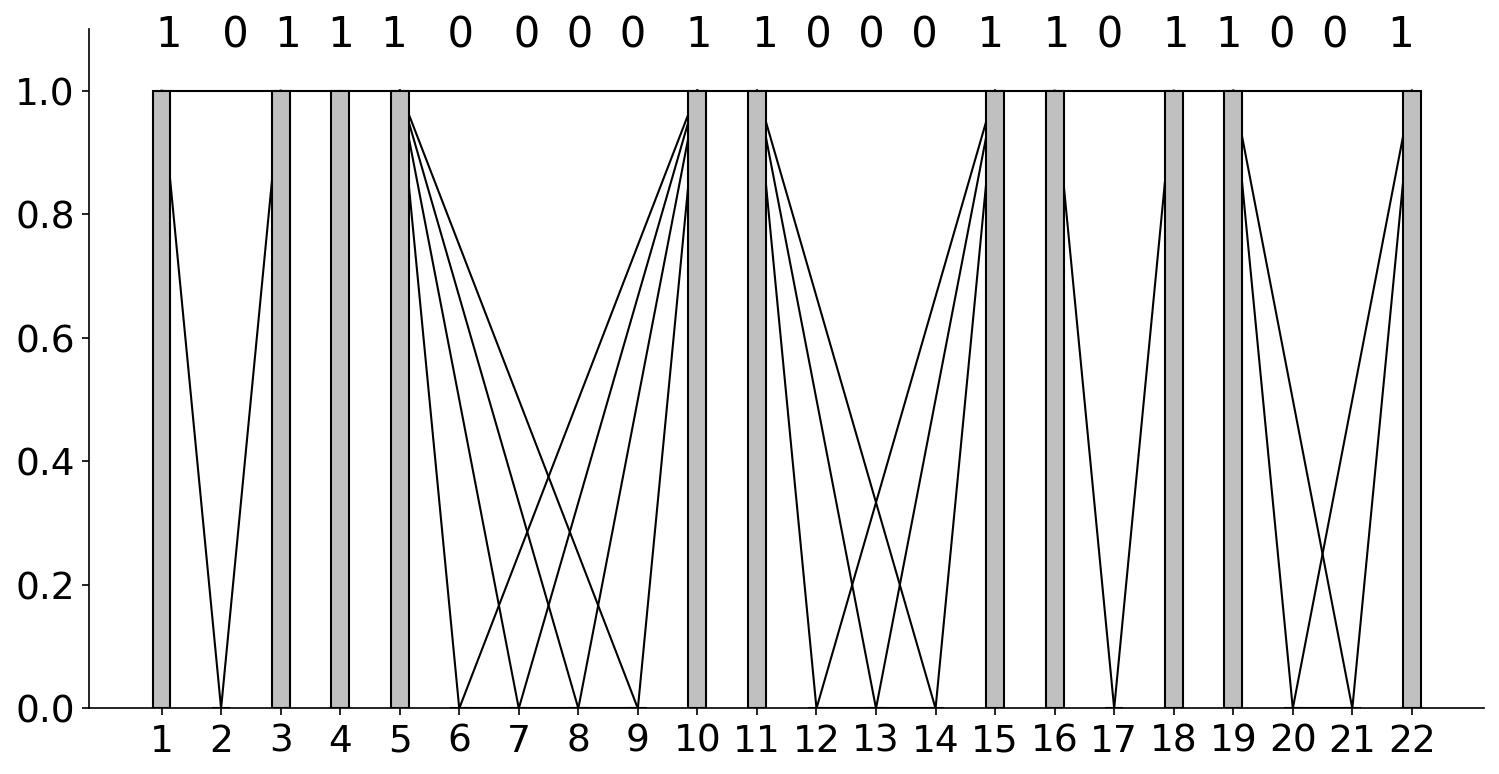

In [8]:
#BVG_bar函数：输入序列Q，输出条形图
def BVG_bar(Q):
    #准备画布，和一个坐标轴
    fig = plt.figure(figsize=(12, 6), dpi=150)#设置图形大小
    ax = fig.add_subplot(111)
    
    #设置样式
    #ax.set_yticks([])#不显示y坐标轴标签
    plt.ylim(0,1.1)
    plt.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)#不显示上边框
    ax.spines['right'].set_visible(False)#不显示右边框
    
    #画条形图
    x= np.array(range(0,len(Q)))
    p1=ax.bar(x,Q,width=0.3,color='#C0C0C0',edgecolor='black',zorder=10)

    #获取要连接两点的坐标
    arr=getBVGPoint(Q)

    #在图中连接两点
    for i in range(0,len(arr[0])):
        p2=ax.plot([arr[0][i],arr[1][i]],[Q[arr[0][i]],Q[arr[1][i]]],color='black',linewidth=1,zorder=0)
    
    #设置x轴刻度的值（为直方条高度），调整字体大小
    plt.xticks(x,range(1, len(Q) + 1),fontsize=18)
    
    
    plt.text(-0.1, 1.07, '1   0  1  1  1   0   0  0  0   1   1  0  0  0   1   1  0   1  1  0  0   1', size=20,
         bbox=dict(boxstyle="square",
                  color="#FFFFFF"
                   )
         )
    #显示图像
    plt.rcParams['xtick.direction'] = 'in' #将x轴的刻度线方向设置向内
    plt.rcParams['ytick.direction'] = 'in' #将y轴的刻度方向设置向内
    
    #保存图片
    #plt.savefig('BVG_bar.png',bbox_inches="tight",dpi=600)
    
    #显示图像
    plt.show()
    
#调用
BVG_bar(Q)

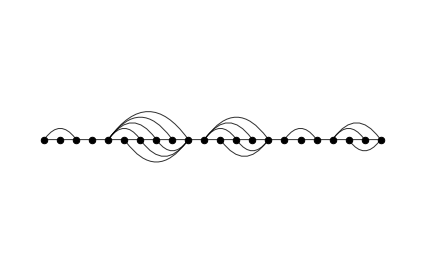

In [5]:
# %matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

def BVG_net(Q):
    arr=getBVGPoint(Q)
    x=np.array(range(0,len(Q)))
    G = nx.Graph()        # 无多重边有向图

    #点
    G.add_nodes_from(x)  # 添加多个节点

    #边
    for i in range(0,len(arr[0])):
        if arr[1][i]-arr[0][i]==1:
            G.add_edges_from([(arr[0][i],arr[1][i])],rad=0)
        else:
            G.add_edges_from([(arr[0][i],arr[1][i])],rad=0.7)

    #位置
    pos=dict()
    for i in range(len(Q),-1,-1):
        sd={i:(i,0)}
        pos={**sd,**pos}
    #画点
    nx.draw_networkx_nodes(G, pos, node_size=42, nodelist=x, node_color="black")

    ax = plt.gca()

    #画边
    edge1=[[],[]]#存储边
    for edge in G.edges(data=True):
        edge1[0].append(edge[0])
        edge1[1].append(edge[1])
        
        if edge[2]["rad"]==0:
            arrowprops=dict(arrowstyle="-",color='black',connectionstyle=f'arc3, rad = -{edge[2]["rad"]}',linestyle= '-',alpha=0.8,)
            ax.annotate("", xy=[edge[0],0], xytext=[edge[1],0],arrowprops=arrowprops)
        else:
            for i in range(len(edge1[0])):
                #判断边是否与前面某条边有交叉，如果有就在下边画
                panduan=edge[0]>edge1[0][i] and edge[0]<edge1[1][i] and edge[1]>edge1[1][i]
                if panduan:
                    arrowprops=dict(arrowstyle="-",color='black',connectionstyle=f'arc3, rad = -{edge[2]["rad"]}',linestyle= '-',alpha=0.8,)
                    ax.annotate("", xy=[edge[0],0], xytext=[edge[1],0],arrowprops=arrowprops)
                    break
            #如果没有就在上边画
            if i==len(edge1[0])-1 and not panduan:
                arrowprops=dict(arrowstyle="-",color='black',connectionstyle=f'arc3, rad = {edge[2]["rad"]}',linestyle= '-',alpha=0.8,)
                ax.annotate("", xy=[edge[0],0], xytext=[edge[1],0],arrowprops=arrowprops)
    
    
    ax.margins(0.11)
    plt.tight_layout()
    plt.axis("off")
    #plt.savefig('BVG_net.png',dpi=600)
    plt.show()

BVG_net(Q)